In [114]:
# Dependencies
import tweepy
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer() 
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')



import time
import json
import random
import requests as req
from datetime import datetime


In [116]:
# Twitter API Keys
#from config import consumer_key, consumer_secret, access_token, access_token_secret
consumer_key = "HUIAGvvNQHFVCfgrxPf5bTGF7"
consumer_secret = "cSTRKvgkocxdt6kS3hVfJwaYjuNEfVPFPaNqJcUphbM7jDHQxu"
access_token = "2690064128-wcSMl9vVnZMDz7d6lTNjUhJaoFwaIanqPUrJdbl"
access_token_secret = "8q5J11E0byn1iFamGwWiwplnZNWPFvGDWhc4M7h36MCwY"

print(consumer_key)

HUIAGvvNQHFVCfgrxPf5bTGF7


In [117]:
# consumer_key = os.environ.get("consumer_key")
# consumer_secret = os.environ.get("consumer_secret")
# access_token = os.environ.get("access_token")
# access_token_secret = os.environ.get("access_token_secret")
print(consumer_key)
print(consumer_secret)
print(access_token)
print(access_token_secret)

HUIAGvvNQHFVCfgrxPf5bTGF7
cSTRKvgkocxdt6kS3hVfJwaYjuNEfVPFPaNqJcUphbM7jDHQxu
2690064128-wcSMl9vVnZMDz7d6lTNjUhJaoFwaIanqPUrJdbl
8q5J11E0byn1iFamGwWiwplnZNWPFvGDWhc4M7h36MCwY


In [118]:

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())


In [119]:
# Create a function that gets the weather in London and Tweets it
target_account_set = set([])

#tweet_dict = {"compound": [], "positive": [], "neutral":[], "negative":[],"tweets ago"}
sentiments = []

def TweetBot():
   
    #tweet_dict = {"text": [], "label": []}

    mentions = api.search(q="@tao6178 Analyze:")
    
    words = []
    oldest_tweet = None

    try:
        command = mentions["statuses"][0]["text"]
        words = command.split("Analyze:")
        target_account = words[1].strip()
        print(f"analysis for target_account: {target_account}")
        
        if target_account not in target_account_set:
            target_account_set.add(target_account)
            counter = 0
            for x in range(3):

                
                user_tweets = api.user_timeline(target_account, max_id = oldest_tweet)

                # Loop through tweets
                for tweet in user_tweets:
                    results = analyzer.polarity_scores(tweet["text"])
                    cpd = results["compound"]
                    pos = results["pos"]
                    neu = results["neu"]
                    neg = results["neg"]
                    counter += 1
                    oldest_tweet = tweet['id'] - 1
                    
                    sentiments.append({"Date": tweet["created_at"], 
                               "Compound": cpd,
                               "Positive": pos,
                               "Negative": neg,
                               "Neutral": neu,
                               "Tweets Ago": counter})
            
            sentiments_pd = pd.DataFrame(sentiments)
            
            fig, ax = plt.subplots(1,1,figsize=(10,6))

            x_vals = sentiments_pd["Tweets Ago"]
            y_vals = sentiments_pd["Compound"]
            plt.plot(x_vals,y_vals, marker="o", linewidth=0.5,alpha=0.8)
            

            
            
            # # Incorporate the other graph properties
            now = datetime.now()
            now = now.strftime("%Y-%m-%d %H:%M")
            plt.title(f"Sentiment Analysis of Tweets ({now}) for {target_account}")
            plt.xlim([x_vals.max(),x_vals.min()]) 
            plt.ylabel("Tweet Polarity")
            plt.xlabel("Tweets Ago")
            plt.show()
            
            
            fig.savefig("sentiment_analysis.png")
            
            #api.update_with_media("sentiment_analysis.png", "Break down of tweet labels for " + target_account)
            api.update_status("Hello There!")

        else:
            print("already analyzed "+target_account)
    
    except IndexError:
        print("nothing found")

        




analysis for target_account: @Wikipedia


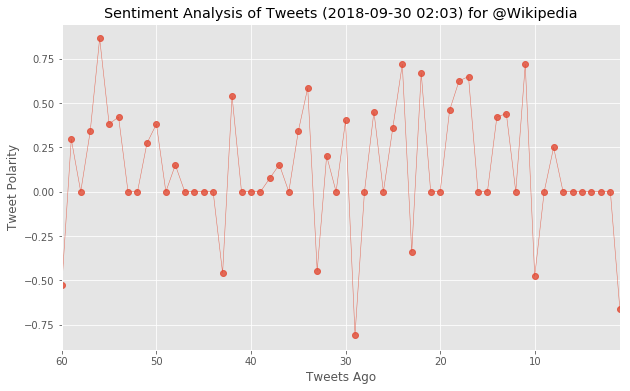

TweepError: [{'message': 'Application cannot perform write actions. Contact Twitter Platform Operations through https://support.twitter.com/forms/platform', 'code': 261}]

In [120]:
# Set timer to run every 1 hour
counter = 0
while(counter < 2):
    TweetBot()
    print("\n")
    time.sleep(2)
    counter += 1